# 1.pandas

## 1.1创建对象
使用pd.DataFrame()函数

In [187]:
# 导入需要的第三方库
import pandas as pd
import numpy as np
# 创建一个6行4列，以2022年1月1日为起始日的数据
df = pd.DataFrame(np.random.rand(6, 4), index=pd.date_range('20220101', periods=6), columns=list("ABCD"))
df

,A,B,C,D
2022-01-01,0.755509,0.602097,0.780190,0.950909
2022-01-02,0.347182,0.749630,0.447924,0.482730
2022-01-03,0.926854,0.686402,0.730568,0.400955
2022-01-04,0.573070,0.424080,0.883800,0.636409
2022-01-05,0.164587,0.520760,0.400180,0.282764
2022-01-06,0.376653,0.296323,0.436994,0.741869


寻找每个月收益率最高的股票 ——apply函数</br>
配置参数如下：</br>
    
    DataFrame.apply(func, axis=0)
func 代表函数；axis=0 时表示对每一列进行运算，axis=1 时表示对每一行进行运算

In [188]:
df.apply(max, axis=0) # 使用 max函数求得每一列的最大值
# 自定义函数——求极差
f = lambda x: x.max()-x.min()
df.apply(f, axis=1)

2022-01-01    0.348812
2022-01-02    0.402448
2022-01-03    0.525899
2022-01-04    0.459720
2022-01-05    0.356173
2022-01-06    0.445546
Freq: D, dtype: float64

## 1.1读取文件

In [189]:
file_path = r"C:\Users\Lu_Cool\Desktop\PythonQuant_cn\PythonANS\Data\Part2\001\history.csv" #文件路径
data = pd.read_csv(file_path) 

读取csv文件也可以使用pd.read_table()函数<br/>
关于pd.read_xxx()函数中常见参数如下：<br/>
    
    pd.read_table(file_path, sep=",",header=None)
file_path 为文件路径，sep 为分隔符，header为None表示选取第0行数据作为列名<br/>

## 1.2查看对象
当数据量过大的时候我们往往只选取其中的一部分来查看

In [190]:
data # 直接使用对象名来访问
data.head() #查看头部的五行
data.tail() #查看末尾五行
data.columns #查看列名
data.index #查看行名
data.values # 查看数据值(以数组形式)

array([[0.0119, 0.0393, 0.0178, ..., 0.018, -0.0166, '1997-01-31'],
       [0.0123, 0.0298, 0.0122, ..., 0.0118, 0.0426, '1997-02-28'],
       [0.0078, -0.0021, -0.0012, ..., 0.001, 0.0778, '1997-03-31'],
       ...,
       [0.0241, -0.0147, 0.0198, ..., 0.0101, -0.0094, '2009-06-30'],
       [0.0611, -0.0012, 0.0311, ..., 0.026, -0.0596, '2009-07-31'],
       [0.0315, 0.0054, 0.0244, ..., 0.0162, -0.0165, '2009-08-31']],
      dtype=object)

## 1.3 DataFrame对象的索引与切片

In [191]:
# 行切片
data[1:3]
# 单独提取某一列
data["CTA.Global"]
# 提取某几列
data[["CTA.Global","Distressed.Securities"]]
# 根据boolean值提取
data[data["Distressed.Securities"]>0]
# 注意：列切片无法进行，同时对行和列进行操作也会出错

,Convertible.Arbitrage,CTA.Global,Distressed.Securities,Emerging.Markets,Equity.Market.Neutral,Event.Driven,Fixed.Income.Arbitrage,Global.Macro,Long.Short.Equity,Merger.Arbitrage,Relative.Value,Short.Selling,Date
0,0.0119,0.0393,0.0178,0.0791,0.0189,0.0213,0.0191,0.0573,0.0281,0.0150,0.0180,-0.0166,1997-01-31
1,0.0123,0.0298,0.0122,0.0525,0.0101,0.0084,0.0122,0.0175,-0.0006,0.0034,0.0118,0.0426,1997-02-28
3,0.0086,-0.0170,0.0030,0.0119,0.0119,-0.0005,0.0130,0.0172,0.0084,-0.0001,0.0122,-0.0129,1997-04-30
4,0.0156,-0.0015,0.0233,0.0315,0.0189,0.0346,0.0118,0.0108,0.0394,0.0197,0.0173,-0.0737,1997-05-31
5,0.0212,0.0085,0.0217,0.0581,0.0165,0.0258,0.0108,0.0218,0.0223,0.0231,0.0198,-0.0065,1997-06-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,0.0500,-0.0140,0.0387,0.0663,-0.0012,0.0337,0.0221,0.0127,0.0375,0.0081,0.0342,-0.0820,2009-04-30
148,0.0578,0.0213,0.0504,0.0884,0.0146,0.0442,0.0365,0.0348,0.0516,0.0107,0.0392,0.0008,2009-05-31
149,0.0241,-0.0147,0.0198,0.0013,0.0036,0.0123,0.0126,-0.0076,0.0009,0.0104,0.0101,-0.0094,2009-06-30
150,0.0611,-0.0012,0.0311,0.0451,0.0042,0.0291,0.0322,0.0166,0.0277,0.0068,0.0260,-0.0596,2009-07-31


### loc函数与iloc函数
loc函数是标签名索引<br>
data.loc[row_indexer, column_indexer]

iloc函数是位置索引<br>
data.iloc[row_indexer, column_indexer]

**注意： 无论是iolc还是loc函数都是中括号[ ]，而非小括号**

In [192]:
# loc函数
# 提取某一列数据
data.loc[:,"Distressed.Securities"]
# 提取某几列数据
data.loc[:,"Distressed.Securities":"Fixed.Income.Arbitrage"]
# 提取特定的行和列
data.loc[:,"Distressed.Securities":"Fixed.Income.Arbitrage"]
# 根据boolean值提取
data.loc[data.loc[:,"Fixed.Income.Arbitrage"]>0]

,Convertible.Arbitrage,CTA.Global,Distressed.Securities,Emerging.Markets,Equity.Market.Neutral,Event.Driven,Fixed.Income.Arbitrage,Global.Macro,Long.Short.Equity,Merger.Arbitrage,Relative.Value,Short.Selling,Date
0,0.0119,0.0393,0.0178,0.0791,0.0189,0.0213,0.0191,0.0573,0.0281,0.0150,0.0180,-0.0166,1997-01-31
1,0.0123,0.0298,0.0122,0.0525,0.0101,0.0084,0.0122,0.0175,-0.0006,0.0034,0.0118,0.0426,1997-02-28
2,0.0078,-0.0021,-0.0012,-0.0120,0.0016,-0.0023,0.0109,-0.0119,-0.0084,0.0060,0.0010,0.0778,1997-03-31
3,0.0086,-0.0170,0.0030,0.0119,0.0119,-0.0005,0.0130,0.0172,0.0084,-0.0001,0.0122,-0.0129,1997-04-30
4,0.0156,-0.0015,0.0233,0.0315,0.0189,0.0346,0.0118,0.0108,0.0394,0.0197,0.0173,-0.0737,1997-05-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,0.0500,-0.0140,0.0387,0.0663,-0.0012,0.0337,0.0221,0.0127,0.0375,0.0081,0.0342,-0.0820,2009-04-30
148,0.0578,0.0213,0.0504,0.0884,0.0146,0.0442,0.0365,0.0348,0.0516,0.0107,0.0392,0.0008,2009-05-31
149,0.0241,-0.0147,0.0198,0.0013,0.0036,0.0123,0.0126,-0.0076,0.0009,0.0104,0.0101,-0.0094,2009-06-30
150,0.0611,-0.0012,0.0311,0.0451,0.0042,0.0291,0.0322,0.0166,0.0277,0.0068,0.0260,-0.0596,2009-07-31


In [193]:
# iloc函数
# 提取某一行数据
data.iloc[2]
# 提取某一列数据
data.iloc[:,2]
# 切片操作
data.iloc[0:3,0:2]

,Convertible.Arbitrage,CTA.Global
0,0.0119,0.0393
1,0.0123,0.0298
2,0.0078,-0.0021


## 1.4DataFrame的操作

In [205]:
# 转置
data.T
# 排序与排名
data.sort_index(ascending=True) #按照索引进行排序
data.sort_values("Fixed.Income.Arbitrage") # 按照某一列的值进行排序
# 追加行和列——append函数和concat函数
df = pd.DataFrame(np.random.rand(2,13))
data.append(df)
pd.concat([data, df],join="inner") # join参数的属性，如果为’inner’得到的是两表的交集，如果是outer，得到的是两表的并集
# 删除数据 ——drop函数和del函数
data.drop("Fixed.Income.Arbitrage", axis=1)
# del data["Fixed.Income.Arbitrage"]
#替换操作
data.loc[:, "Fixed.Income.Arbitrage"] = np.arange(0,len(data))    

## 1.5描述性统计

In [15]:
# 对新兴市场风格对冲基金收益率进行描述性统计 ——describe函数
EM_data = data['Emerging.Markets']
EM_data.describe()
#计算算术平均数 ——使用mean函数
EM_data.mean()
# 计算中位数 ——median函数
EM_data.median()
# 计算众数 ——mode函数
EM_data.mode()
# 计算10分位数和90分位数 ——quantile函数
[EM_data.quantile() for i in [0.1, 0.9]] # 方式二
EM_data.quantile([0.1,0.9])

# 求极差range ——max函数和min函数
EM_data.max() - EM_data.min()
# 计算平均绝对偏差 ——mad函数
mad = sum([abs(x - EM_data.mean()) for x in EM_data]
         )/len(EM_data) # 不使用mad函数求得平均绝对偏差
EM_data.mad() # 使用mad函数
# 求标准差 ——std函数
EM_data.std()

0.0385714352008603

# 2.matplotlib

## 2.1 修改图象属性

In [80]:
# 导入需要的第三方库
import matplotlib.pyplot as plt
# 绘制收益率曲线对比图
FIA__data = data['Fixed.Income.Arbitrage']
RV_data = data['Relative.Value']

### 2.1.1使用xlim和ylim调整坐标轴范围
plt.xlim(min, max)

(-1.0, 9.0)

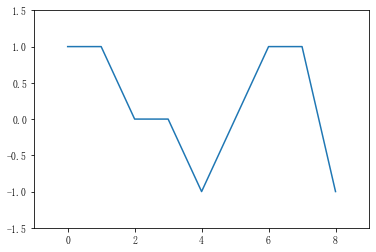

In [81]:
# 调节x，y轴范围
plt.plot([1,1,0,0,-1,0,1,1,-1])
plt.ylim(-1.5, 1.5)
plt.xlim(-1, 9)

### 2.1.2设定坐标标签和显示角度
plt.xticks(location, labels)

location表示坐标位置

labels表示坐标的标签

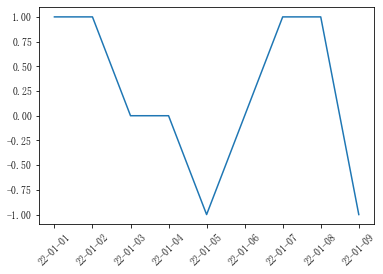

In [82]:
plt.plot([1,1,0,0,-1,0,1,1,-1])
plt.xticks(range(9),pd.date_range("20220101", periods=9).strftime("%y-%m-%d").to_list(), rotation=45)
plt.show()

## 2.2添加文本

### 2.2.1添加标题

    plt.title(s,loc)

s表示传入的参数必须为字符串类型

loc表示标题位置——center、left和right三种

Text(0.5, 1.0, '固定收益套利模型收益率曲线')

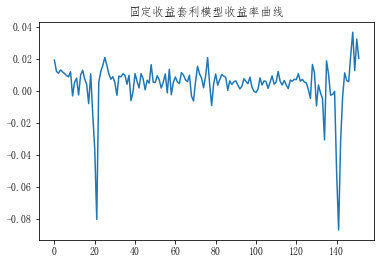

In [83]:
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
plt.plot(FIA__data)
plt.title("固定收益套利模型收益率曲线", loc="center")

### 2.2.2设置坐标轴标签
xlabel("str")

ylabel("str")

Text(0, 0.5, '收益率')

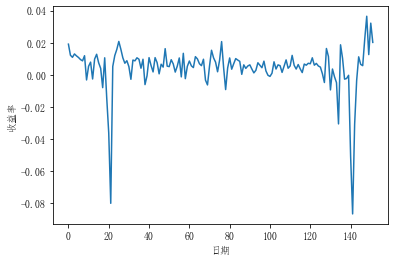

In [84]:
# 设定图形标签、
plt.plot(FIA__data)
plt.xlabel("日期")
plt.ylabel("收益率")

### 2.2.3增加图形背景

    plt.grid(b=None, which="major/minor/both",axis="x/y/both")
b表示是否要显示图形背景

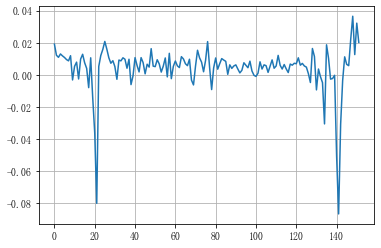

In [85]:
plt.plot(FIA__data)
plt.grid(True, "major", axis="both")

### 2.2.4增加图例及线条属性
* 增加图例<br>
    plt.legend(loc)<br>
loc表示图例的位置，常用best
* 线条属性<br>
    plt.plot(linestyle/ls=".", color/c=""r)<br>
 线条属性linestyle/ls可用参数主要有:
    "-","_","-."," ",":"。<br>
 线条颜色为color/c
    

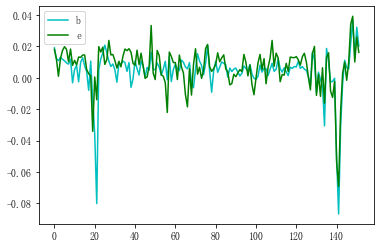

In [86]:
plt.plot(FIA__data, label="FIA", c="c")
plt.plot(RV_data, label="RV", c="g")
plt.legend("best")

### 2.2.5子图绘制和多图绘制

Text(0.5, 1.0, 'rate')

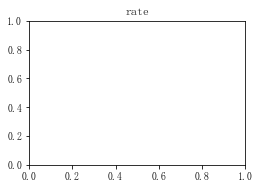

In [106]:
# 子图绘制——自定义绘图
# 创建 axes对象，相当于拿出来一张白纸
fig = plt.figure()
# axes的存在依赖于fig，，在白纸上画好区域
ax = fig.add_axes([0,0,0.5,0.5])  # 前两个数字表示坐标（0，0），后两个数字表示长和宽
# 以下表达式为添加图标信息
ax.set_label("date")
ax.set_xlim(0,1)
ax.set_title("rate")
# ax.set_xticklabels("")

<ipython-input-109-1acb84803ab3>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = plt.subplot(221)
<ipython-input-109-1acb84803ab3>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax3 = plt.subplot(221)
<ipython-input-109-1acb84803ab3>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be create

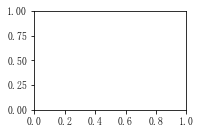

In [109]:
# 子图绘制——subplot绘图
ax1 = plt.subplot(221)
ax2 = plt.subplot(221)
ax3 = plt.subplot(221)
ax4 = plt.subplot(221)
# 22表示一共有四个图，为2\*2矩阵形式，1，2，3，4表示第几张图

Text(0.5, 1.0, '两种模式下的收益率曲线')

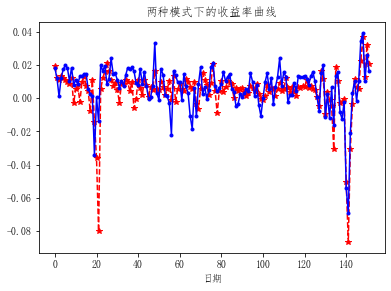

In [108]:
# 多曲线绘制
fig = plt.figure() # 创建fig对象
ax = fig.add_axes([0, 0, 0.8, 0.8]) # 创建ax对象  
ax.plot(FIA__data, "--*", c="r")
ax.plot(RV_data, ".-", c="b")
ax.set_xlabel("日期")
ax.set_title("两种模式下的收益率曲线")